# What is KNN

K-Nearest Neighbours is a supervised machine learning algorithm that makes predictions based on the K closest data points in the training set

Works for:
1. Classification
2. Regression

How it works:
1. Pick a value of K
2. For a new point -> calculate the distance to all training points
3. Choose the K nearest
4. For classification -> majority vote
5. For regression -> average the values

Distance Metrics:
1. Euclidean Distance
2. Manhattan Distance
3. Minkowski Distance

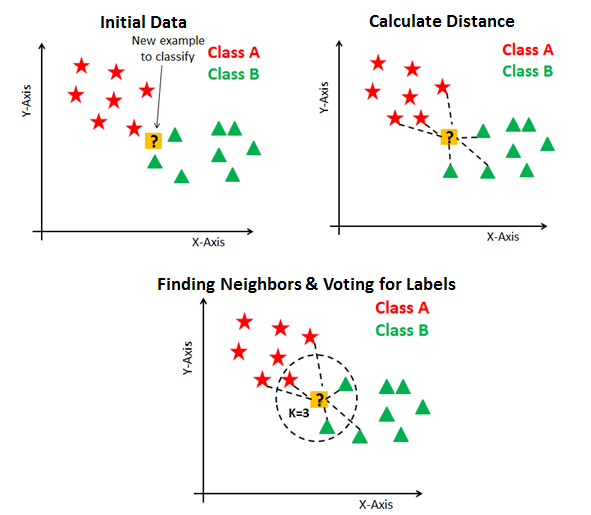

In [1]:
# Artificial Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [3]:
# Create a data
np.random.seed(42)
class_0 = np.random.randn(100, 2) + np.array([0, 0])
class_1 = np.random.randn(100, 2) + np.array([4, 4])

X = np.vstack([class_0, class_1])
y = np.array([0]*100 + [1]*100)

In [4]:
X

array([[ 4.96714153e-01, -1.38264301e-01],
       [ 6.47688538e-01,  1.52302986e+00],
       [-2.34153375e-01, -2.34136957e-01],
       [ 1.57921282e+00,  7.67434729e-01],
       [-4.69474386e-01,  5.42560044e-01],
       [-4.63417693e-01, -4.65729754e-01],
       [ 2.41962272e-01, -1.91328024e+00],
       [-1.72491783e+00, -5.62287529e-01],
       [-1.01283112e+00,  3.14247333e-01],
       [-9.08024076e-01, -1.41230370e+00],
       [ 1.46564877e+00, -2.25776300e-01],
       [ 6.75282047e-02, -1.42474819e+00],
       [-5.44382725e-01,  1.10922590e-01],
       [-1.15099358e+00,  3.75698018e-01],
       [-6.00638690e-01, -2.91693750e-01],
       [-6.01706612e-01,  1.85227818e+00],
       [-1.34972247e-02, -1.05771093e+00],
       [ 8.22544912e-01, -1.22084365e+00],
       [ 2.08863595e-01, -1.95967012e+00],
       [-1.32818605e+00,  1.96861236e-01],
       [ 7.38466580e-01,  1.71368281e-01],
       [-1.15648282e-01, -3.01103696e-01],
       [-1.47852199e+00, -7.19844208e-01],
       [-4.

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [6]:
df = pd.DataFrame({"x1":X[:, 0], "x2":X[:, 1], "label": y})

In [8]:
df

,x1,x2,label
0,0.496714,-0.138264,0
1,0.647689,1.523030,0
2,-0.234153,-0.234137,0
3,1.579213,0.767435,0
4,-0.469474,0.542560,0
...,...,...,...
195,3.101585,4.491919,1
196,2.679767,5.831459,1
197,5.179440,3.530824,1
198,2.286865,5.353872,1


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['x1', 'x2']], df['label'], test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
X_train_scaled

array([[-1.39535165, -0.6320871 ],
       [ 1.35959895,  0.66793339],
       [-0.84254449, -1.06428328],
       [-0.73159339, -1.72645912],
       [ 0.33051083,  0.72884606],
       [ 0.46105592,  1.10263251],
       [-0.7369361 , -0.48780859],
       [-1.45454484, -0.84000402],
       [ 0.7839268 ,  1.14623293],
       [-0.91352864, -0.77474193],
       [ 0.54024003,  1.18751874],
       [ 0.22335795,  0.24354964],
       [-1.08058629, -1.13969112],
       [ 1.76726506,  1.34711922],
       [ 1.77668696,  1.16685844],
       [-1.41509123, -1.52628046],
       [ 0.89865361,  1.17961845],
       [-1.26240034, -0.85951431],
       [ 0.64586963,  0.98509475],
       [-0.7876047 , -1.4924859 ],
       [ 1.0281316 ,  0.62516932],
       [-0.80529695, -0.7547661 ],
       [-1.35860805, -1.47008271],
       [-1.11559863, -0.8788737 ],
       [-0.72390581, -0.23339609],
       [ 0.56338291,  1.26569154],
       [-1.22981017, -1.15598611],
       [ 1.79651806,  0.51454966],
       [-0.6096247 ,

In [12]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

In [13]:
accuracy_score(y_test, y_pred)

1.0

In [16]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

cm = confusion_matrix(y_test, y_pred)
cm

array([[21,  0],
       [ 0, 19]])

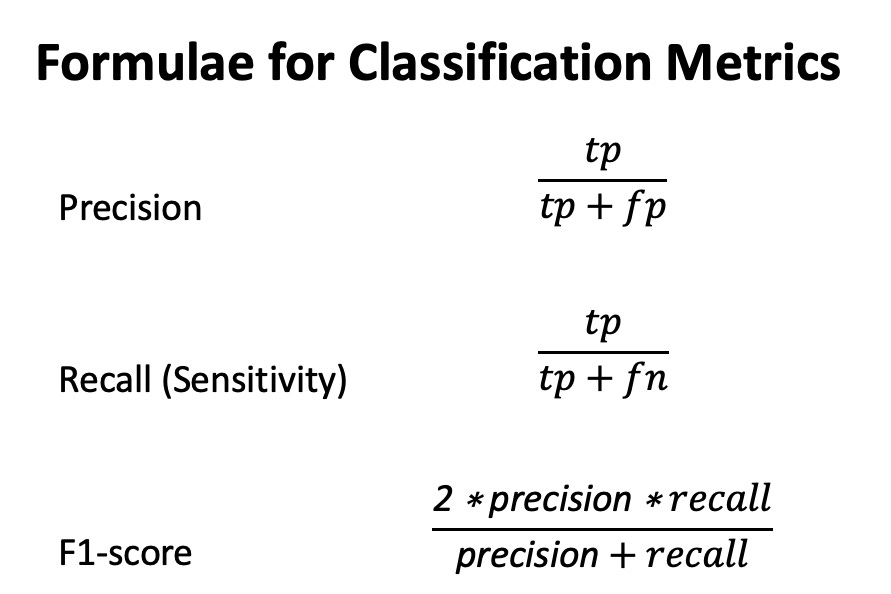

In [17]:
ps = precision_score(y_test, y_pred)
rs = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

In [18]:
display(ps, rs, f1_score)

1.0

1.0

1.0

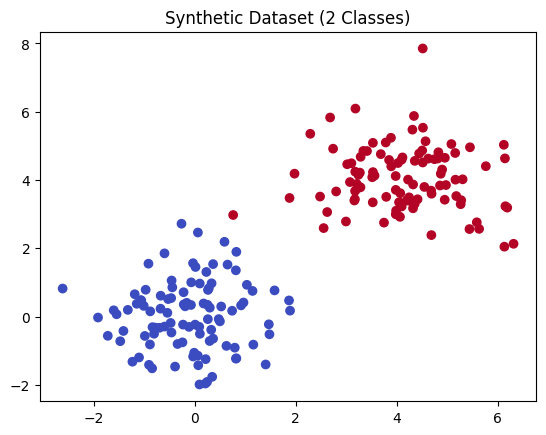

In [21]:
plt.scatter(df['x1'], df['x2'], c=df['label'], cmap='coolwarm')
plt.title("Synthetic Dataset (2 Classes)")
plt.show()

In [22]:
df = pd.read_csv("data/IRIS.csv")

In [23]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
X = df.drop(columns=['species'])
y = df['species']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

In [28]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [30]:
accuracy_score(y_test, y_pred)

1.0

In [32]:
precision_score(y_test, y_pred, average='micro')

1.0

In [35]:
recall_score(y_test, y_pred, average='micro')

1.0